# ORTHOGONAL POLYNOMIAL DENSITY ESTIMATION
## Preliminaries
### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
from uuid import uuid4

from lpde.geometry import WidthOf, Window, PointAt, BoundingBox, Mapper, Grid
from lpde.estimators import ParallelEstimator
from lpde.estimators.datatypes import Event, Degree, Action, Signal
from lpde.producers import MockParams, MockProducer
from lpde.producers.distributions import gaussian

### Notebook settings

In [2]:
%matplotlib notebook

## Density Estimation
### Initialize

In [3]:
legendre_width = WidthOf(1.8)

center = PointAt(0, 0)
window = Window(1.8, 1.8)
bounds = BoundingBox(center, window)

mapper = Mapper(bounds, legendre_width)

degree = Degree(20, 20)
params = MockParams(20, 100, gaussian)
density = ParallelEstimator(degree, mapper, params)

action = Action.ADD
point = PointAt(0.5, 0.5)
event = Event(uuid4(), action, point)

grid = Grid(100, 100)

In [6]:
density.controller.start(1, 1.0)

/Users/georg/Documents/Python/LPDE/lpde/estimators/parallel/minimizer.py:77: RuntimeWarning: overflow encountered in double_scalars
  return self.__neg_log_l(c[1:]) + c[0]*self.__norm(c[1:])
/Users/georg/Documents/Python/LPDE/lpde/estimators/parallel/minimizer.py:85: RuntimeWarning: overflow encountered in square
  return -log(square(c.dot(self.__phi_ijn))).sum()
/Users/georg/Documents/Python/LPDE/lpde/estimators/parallel/minimizer.py:81: RuntimeWarning: overflow encountered in multiply
  self.__grad_c[1:] = self.__grad_neg_log_l(c[1:]) + 2.0*c[0]*c[1:]


In [ ]:
density.controller.is_alive

In [18]:
density.controller.control_queue.put(Signal.STOP)

In [ ]:
susi = density.controller.event_queue.get_nowait()
susi.action

In [27]:
#density.controller.stop()
density.controller.are_alive

{'minimizers': (False,),
 'producer': False,
 'smoother': False,
 'transformer': False}

In [26]:
density.controller.producer.terminate()

In [ ]:
density.controller.event_queue.empty()

In [29]:
density.controller.stop()

### Plot final density

<IPython.core.display.Javascript object>


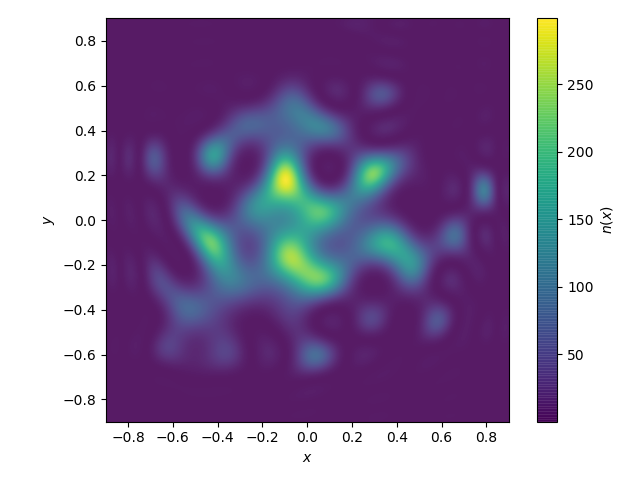

In [33]:
n_hat = density.on(grid)

fig, ax = plt.subplots()
ax.set(xlabel=r'$x$', ylabel=r'$y$')
contour = ax.imshow(n_hat,
                    cmap='viridis',
                    alpha=0.9,
                    extent=bounds.x_range+bounds.y_range,
                    origin='lower',
                    interpolation='bicubic')
cbar = plt.colorbar(contour, ax=ax, label=r'$n(x)$')
fig.tight_layout()

In [ ]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.tile_providers import STAMEN_TONER, STAMEN_TERRAIN

bound = 20000000 # meters
fig = figure(tools='pan, wheel_zoom', x_range=(-bound, bound), y_range=(-bound, bound))
fig.axis.visible = False
fig.add_tile(STAMEN_TERRAIN)
output_file("stamen_toner_plot.html")
show(fig)

In [32]:
from bokeh.plotting import figure, show, output_file

p = figure(x_range=bounds.x_range, y_range=bounds.y_range)

# must give a vector of image data for image parameter
p.image(image=[n_hat],
        x=bounds.x_range[0],
        y=bounds.y_range[0],
        dw=bounds.window[0],
        dh=bounds.window[1],
        palette="Spectral11",
        alpha=0.8)

output_file("image.html", title="image.py example")

show(p)  # open a browser

In [ ]:
from enum import Enum

In [ ]:
class Inner(Enum):
    STOP = 1
    CONTINUE = -1

In [ ]:
class Signal_:
    producer = Inner
    transformer = Inner
    minimizer = Inner
    smoother = Inner

In [ ]:
try:
    raise ValueError
except ValueError:
    pass
else:
    print('OK')

In [ ]:
Signal.STOP

In [ ]:
sigi = Signal_()

In [ ]:
sigi.minimizer.CONTINUE

In [ ]:
type(sigi)

In [ ]:
type(Signal.transformer.STOP) = Commands

In [ ]:
str(Signal.TRANSFORMER_CONTINUE)